<a href="https://colab.research.google.com/github/PGV1000/data_mining/blob/main/%D0%9C%D0%B5%D0%B4%D0%B2%D0%B5%D0%B4%D0%B5%D0%B2_%D0%9F%D0%A0_%E2%84%964__%D0%A0%D0%B5%D1%88%D0%B0%D1%8E%D1%89%D0%B8%D0%B5_%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *0. Ознакомиться с [блокнотом](https://colab.research.google.com/drive/1PwN8igT5w2xArBGmM6rvO9pVRQMh-FQn?usp=sharing)

# 1. Дерево решений для классификации

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np

### Получение данных

Будем работать с набором данных для задачи классификации - данные по сердечно сосудистым заболеваниям, довольно стандартный набор для изучения машинного обучения, но его нет в `sklearn'e`. Поэтому скачиваем данные со стороны, с google диска.

Ссылка на google drive: https://drive.google.com/file/d/1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G


In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G' -O cardio.csv

--2024-10-17 15:13:51--  https://drive.google.com/uc?export=download&id=1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G
Resolving drive.google.com (drive.google.com)... 108.177.97.138, 108.177.97.139, 108.177.97.102, ...
Connecting to drive.google.com (drive.google.com)|108.177.97.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G&export=download [following]
--2024-10-17 15:13:51--  https://drive.usercontent.google.com/download?id=1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.125.132, 2404:6800:4008:c01::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.125.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2941524 (2.8M) [application/octet-stream]
Saving to: ‘cardio.csv’

cardio.csv          100%[===================>]   2.80M  --.-KB/s  

В задаче предалагается предсказать наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра. Датасет сформирован 3 групп признаков:

Объективные признаки:
- Возраст (в днях)
- Рост
- Вес
- Пол

Результаты измерения:

- Артериальное давление верхнее и нижнее
- Холестерин (три группы: норма, выше нормы, значительно выше нормы)
- Глюкоза (три группы: норма, выше нормы, значительно выше нормы)

Субъективные признаки (бинарные):

- Курение
- Употребление Алкоголя
- Физическая активность

In [ ]:
import pandas as pd
df = pd.read_csv('cardio.csv', delimiter= ';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
full_features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
                 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
target = 'cardio'

In [ ]:
df['age'] = round(df['age'] / 365)

## 1. Вводная

### 1.1 Сколько вопросов будет задано на первом этапе

Посчитайте, сколько вопросов задаст дерево решений в самый первый раз, если использовать все признаки из списка full_features.

In [ ]:
X = df[full_features]
y = df[target]
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X, y)
tree.get_depth()

42

### 1.2 Упростите задачу

Вопросов получилось достаточно, не будет моделировать столько вопросов, а попробуем уменьшить их количество.

Возьмите только два признака: weight и gluc.
А так же возьмите только 10 первых объектов.

In [ ]:
# Ваш код здесь
features = ['weight','gluc']
df2 = df.copy()
df2 = df2.head(10)

### 1.3 Посчитайте еще раз, сколько будет вопросов

In [ ]:
X = df2[features]
y = df2[target]
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X, y)
tree.get_depth()

3

С таким количеством вопросов уже можем работать и разбираться в устройству дерева решений.

## 2. Устройство дерева решений

### 2.1 Обучите дерево решений

Обучите дерево решений из sklearn'a с атрибутом `random_state=1`.

In [ ]:
# Ваш код здесь
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X, y)

DecisionTreeClassifier(random_state=1)

### 2.2 Отрисуйте обученное дерево решений

Нарисуйте дерево решений, которое у вас получилось после обучения. Сделайте отрисовку такой, чтобы можно было понять, какие вопросы задаются

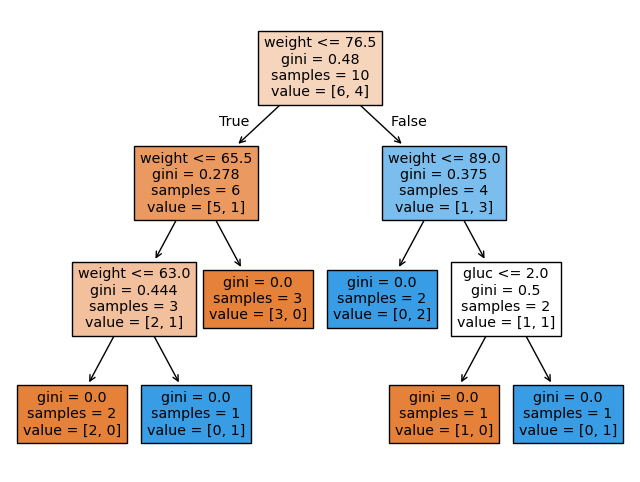

In [ ]:
plt.figure(figsize=(8, 6))
plot_tree(tree, feature_names=features, filled=True);

### 2.3 Посчитайте, сколько вершин получилось

In [ ]:
tree.tree_.node_count

11

### 2.4 Посчитайте, сколько листов получилось

In [ ]:
tree.tree_.n_leaves

6

### 2.5 Посмотрите, почему не получилось сделать разбиение ещё на два узла в крайнем левом узле.

В узле, где
```
gini=0.5
samples=2
value=[1, 1]
```

Потому что осталось только 2 объекта

## 3. Вспомогательные функции

Для того, что бы дальше сравнивать между собой объекты нужно реализовать две вспомогательные функции.

### 3.1 Функция подсчета критерия Джини

Функция должна принимать список целевых значений, считать критерий информативности и выдавать одно значение - критерий Джини.

In [ ]:
def gini_impurity(labels):
    total = len(labels)
    if total == 0:
        return 0
    counts = pd.Series(labels).value_counts()
    probabilities = counts / total
    gini = 1 - sum(probabilities**2)
    return gini


### 3.2 Проверка функции gini

Посчитайте критерий информативности в исходной выборке и вы должны получить точно такое же значение, как и было на визуализации дерева решений в его корне.

In [ ]:
gini_impurity(df2['cardio'])

0.48

### 3.3 Функция подсчета прироста информации

Функция должна принимать целевые значения левой подвыборки, правой подвыборки и исходной вершины, а выдавать должна одно значение - прирост информации, подсчитанный на критерии информативности Джини.

In [ ]:
def information_gain(up_labels, left_labels, right_labels):
    up_gini = gini_impurity(up_labels)
    left_gini = gini_impurity(left_labels)
    right_gini = gini_impurity(right_labels)
    left_weight = len(left_labels) / len(up_labels)
    right_weight = len(right_labels) / len(up_labels)
    weighted_gini = left_weight * left_gini + right_weight * right_gini
    information_gain = up_gini - weighted_gini
    return information_gain

In [ ]:
y2 = y[:4]
y3 = y[4:]
information_gain(y, y2, y3)

0.16333333333333333

Теперь вспомогательные функции готовы можем моделировать работу обученного дерева решений.

## 4. Процесс построения дерева решений

### 4.1 Получение первого вопроса


4.1.1 Пройдитесь по всем возможным вопросам для исходного набора данных


Можете сохранять полученные значения прироста информации в датафрейм в удобную для вас структуру данных.

In [ ]:
myTree = pd.DataFrame(columns=['question', 'information_gain'])

for feature in features:
  for threshold in df2[feature].unique():
    left_labels = df2[df2[feature] <= threshold]['cardio']
    right_labels = df2[df2[feature] > threshold]['cardio']
    question = f"{feature} <= {threshold}"
    information_gain_value = information_gain(df2['cardio'], left_labels, right_labels)
    new_row = pd.DataFrame({'question': [question], 'information_gain': [information_gain_value]})
    myTree = pd.concat([myTree, new_row])
myTree.sort_values(by='information_gain')
myTree.head()

<ipython-input-17-11b6b198ae5f>:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  myTree = pd.concat([myTree, new_row])


,question,information_gain
0,weight <= 62.0,0.080000
0,weight <= 85.0,0.005000
0,weight <= 64.0,0.003810
0,weight <= 82.0,0.060952
0,weight <= 56.0,0.035556


4.1.2 Найдите самый лучший вопрос, опираясь на прирост информации

In [ ]:
myTree.sort_values(by='information_gain', ascending=False).head(1)

,question,information_gain
0,weight <= 71.0,0.163333


4.1.3. Сделайте разбиение по этому вопросу исходных данных на две подвыборки df_left и df_right


In [ ]:
df_left = df2[df2['weight'] <= 71.0]
df_right = df2[df2['weight'] > 71.0]

4.1.4. Проверьте себя через визуализацию дерева решений

In [ ]:
from io import StringIO
import pydotplus
from ipywidgets import Image
from sklearn.tree import export_graphviz

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=features, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xf1\x00\x00\x01\xf1\x08\x02\x00\x00\x00k\xb2t+\x…

### 4.2 Получение второго вопроса


4.2.1. Глядя на df_left и df_right, посмотрите, где можно сделать ещё разбиение

In [ ]:
df_left.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.0,6.0,6.000000,6.000000
mean,6.833333,52.000000,1.166667,160.333333,64.666667,113.333333,70.000000,1.50000,1.166667,0.0,0.0,0.333333,0.166667
std,5.810909,4.560702,0.408248,6.408328,5.278889,10.327956,8.944272,0.83666,0.408248,0.0,0.0,0.516398,0.408248
min,0.000000,48.000000,1.000000,151.000000,56.000000,100.000000,60.000000,1.00000,1.000000,0.0,0.0,0.000000,0.000000
25%,2.500000,48.500000,1.000000,156.500000,62.500000,110.000000,62.500000,1.00000,1.000000,0.0,0.0,0.000000,0.000000
50%,6.000000,51.000000,1.000000,161.000000,65.500000,110.000000,70.000000,1.00000,1.000000,0.0,0.0,0.000000,0.000000
75%,11.750000,53.500000,1.000000,164.750000,67.750000,117.500000,77.500000,1.75000,1.000000,0.0,0.0,0.750000,0.000000
max,14.000000,60.000000,2.000000,168.000000,71.000000,130.000000,80.000000,3.00000,2.000000,0.0,0.0,1.000000,1.000000


4.2.2. Пройдитесь по всем признакам в выбранной подвыборке

In [ ]:
myTree2 = pd.DataFrame(columns=['question', 'information_gain'])
for feature in features:
  for threshold in df_left[feature].unique():
    left_labels = df_left[df_left[feature] <= threshold]['cardio']
    right_labels = df_left[df_left[feature] > threshold]['cardio']
    question = f"{feature} <= {threshold}"
    information_gain_value = information_gain(df_left['cardio'],left_labels, right_labels)
    new_row = pd.DataFrame({'question': [question], 'information_gain': [information_gain_value]})
    myTree2 = pd.concat([myTree2, new_row])


myTree3 = pd.DataFrame(columns=['question', 'information_gain'])
for feature in features:
  for threshold in df_right[feature].unique():
    left_labels = df_right[df_right[feature] <= threshold]['cardio']
    right_labels = df_right[df_right[feature] > threshold]['cardio']
    question = f"{feature} <= {threshold}"
    information_gain_value = information_gain(df_right['cardio'],left_labels, right_labels)
    new_row = pd.DataFrame({'question': [question], 'information_gain': [information_gain_value]})
    myTree3 = pd.concat([myTree3, new_row])

<ipython-input-22-aac1cb33df18>:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  myTree2 = pd.concat([myTree2, new_row])
<ipython-input-22-aac1cb33df18>:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  myTree3 = pd.concat([myTree3, new_row])


4.2.3 Найдите самый лучший вопрос, опираясь на прирост информации

In [ ]:
print(myTree2.sort_values(by='information_gain', ascending=False).head(1))
print(myTree3.sort_values(by='information_gain', ascending=False).head(1))

         question  information_gain
0  weight <= 64.0          0.055556
         question  information_gain
0  weight <= 85.0             0.125


4.2.4. Сделайте разбиение по этому вопросу исходных данных на две подвыборки df_left и df_right


In [ ]:
df_left = df_left[df_left['weight'] <= 64]
df_right = df_left[df_left['weight'] > 64]

4.2.5. Проверьте себя через визуализацию дерева решений

In [ ]:
from io import StringIO
import pydotplus
from ipywidgets import Image
from sklearn.tree import export_graphviz

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=features, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xf1\x00\x00\x01\xf1\x08\x02\x00\x00\x00k\xb2t+\x…

4.2.6. Если что-то не сошлось, посмотрите, в чем может быть проблема

# 2. Дерево решений для регрессии

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

### 1. Получение данных load_breat_cancer

Будем работать с набором данных для задачи регрессии `load_diabetes`, который можно получить из стандартных датасетов в `sklearn'e`.

После `load_diabetes()` возвращается словарь с данными (`data`), целевой переменной (`target`), названиями характеристик в данных (`feature_names`) и описанием данных (`DESCR`).

In [ ]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [ ]:
X = data.data
features = data.feature_names
y = data.target

Из признаков (характеристик данных) и целевой переменной сформируем датафрейм, в качестве названий колонок возьмем названия признаков.

In [ ]:
df = pd.DataFrame(X, columns=features)
df['target'] = y

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Разобьем выборку на две: обучающую и тестовую.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features],
    df['target'],
    test_size=0.2,
    shuffle=True,
    random_state=3
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((353, 10), (353,), (89, 10), (89,))

### 1.1. Обучение дерева решений

1. Инициализируйте дерево решений для задачи регрессии
2. Обучите его на обучающей выборке

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor()

### 1.2. Получение метрик качества
Узнаем, насколько дерево решений обучилось хорошо, для этого
1. Сделайте предсказания моделью для обучающей выборки
2. Сделайте предсказания моделью для тестовой выборки
3. Посчитайте метрику качества средне-квадратичная ошибка
4. Посчитайте метрику качества коэффициент детерминации

In [ ]:
train_prediction = tree.predict(X_train)
test_prediction = tree.predict(X_test)
mse_train = (np.sum((y_train - train_prediction) ** 2) / len(y_train))
determination_coeff_train = r2_score(y_train, train_prediction)
print(f'Средне-кваратичная ошибка обучающей выборки: {mse_train}')
print(f'Коэффициент детерминации обучающей выборки: {determination_coeff_train}')
mse_test = (np.sum((y_test - test_prediction) ** 2) / len(y_test))
determination_coeff_test = r2_score(y_test, test_prediction)
print(f'Средне-кваратичная ошибка тестовой выборки: {mse_test}')
print(f'Коэффициент детерминации тестовой выборки: {determination_coeff_test}')

Средне-кваратичная ошибка обучающей выборки: 0.0
Коэффициент детерминации обучающей выборки: 1.0
Средне-кваратичная ошибка тестовой выборки: 6009.876404494382
Коэффициент детерминации тестовой выборки: -0.10991906191636791


Сделайте вывод, насколько хорошо обучилась модель

Модель обучилась отлично

### 1.3. Изменение метрики

Попробуйте поизменять известные параметры для того, чтобы метрика стала *лучше*.

In [ ]:
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2)

In [ ]:
train_prediction = tree.predict(X_train)
test_prediction = tree.predict(X_test)
mse_train = (np.sum((y_train - train_prediction) ** 2) / len(y_train))
determination_coeff_train = r2_score(y_train, train_prediction)
print(f'Средне-кваратичная ошибка обучающей выборки: {mse_train}')
print(f'Коэффициент детерминации обучающей выборки: {determination_coeff_train}')
mse_test = (np.sum((y_test - test_prediction) ** 2) / len(y_test))
determination_coeff_test = r2_score(y_test, test_prediction)
print(f'Средне-кваратичная ошибка тестовой выборки: {mse_test}')
print(f'Коэффициент детерминации тестовой выборки: {determination_coeff_test}')

Средне-кваратичная ошибка обучающей выборки: 3395.236119319029
Коэффициент детерминации обучающей выборки: 0.43876842192045373
Средне-кваратичная ошибка тестовой выборки: 3423.442293859838
Коэффициент детерминации тестовой выборки: 0.3677500827664013


### 2. Получение данных make_regression

Для второго примера возьмем самодельный набор данных для задачи регрессии `make_regression`, который можно получить из стандартных датасетов в `sklearn'e`.

Сгенерируем себе 100к объектов, которые описываются 20 признаками, из них 12 будут дейтсвительно полезными.

In [ ]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100_000, n_features=20, n_informative=12, random_state=10)

In [ ]:
X.shape, y.shape

((100000, 20), (100000,))

Разобьем выборку на две: обучающую и тестовую.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=3
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80000, 20), (80000,), (20000, 20), (20000,))

### 2.1. Обучение дерева решений

1. Инициализируйте дерево решений для задачи регрессии
2. Обучите его на обучающей выборке

In [ ]:
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor()

### 2.2. Получение метрик качества
Узнаем, насколько дерево решений обучилось хорошо, для этого
1. Сделайте предсказания моделью для обучающей выборки
2. Сделайте предсказания моделью для тестовой выборки
3. Посчитайте метрику качества средне-квадратичная ошибка
4. Посчитайте метрику качества коэффициент детерминации

In [ ]:
train_prediction = tree.predict(X_train)
test_prediction = tree.predict(X_test)
mse_train = (np.sum((y_train - train_prediction) ** 2) / len(y_train))
determination_coeff_train = r2_score(y_train, train_prediction)
print(f'Средне-кваратичная ошибка обучающей выборки: {mse_train}')
print(f'Коэффициент детерминации обучающей выборки: {determination_coeff_train}')
mse_test = (np.sum((y_test - test_prediction) ** 2) / len(y_test))
determination_coeff_test = r2_score(y_test, test_prediction)
print(f'Средне-кваратичная ошибка тестовой выборки: {mse_test}')
print(f'Коэффициент детерминации тестовой выборки: {determination_coeff_test}')

Средне-кваратичная ошибка обучающей выборки: 0.0
Коэффициент детерминации обучающей выборки: 1.0
Средне-кваратичная ошибка тестовой выборки: 16747.62559516671
Коэффициент детерминации тестовой выборки: 0.689789618290377


Сделайте вывод, насколько хорошо обучилась модель

Модель переобучилась

### 2.3. Перебор гиперпараметров

Осуществите перебор параметров для получения лучших результатов (GridSearchCV, см. подход из п.0).

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
tree_params = {"max_depth": range(10, 11), "max_features": range(18, 20)}
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

In [ ]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(10, 11),
                         'max_features': range(18, 20)},
             verbose=True)

In [ ]:
tree_grid.best_params_

{'max_depth': 10, 'max_features': 19}

In [ ]:
tree_grid.best_score_

0.6758210785161064

In [ ]:
train_prediction = tree_grid.predict(X_train)
test_prediction = tree_grid.predict(X_test)
mse_train = (np.sum((y_train - train_prediction) ** 2) / len(y_train))
determination_coeff_train = r2_score(y_train, train_prediction)
print(f'Средне-кваратичная ошибка на обучающей выборке: {mse_train}')
print(f'Коэффициент детерминации на обучающей выборке: {determination_coeff_train}')
mse_test = (np.sum((y_test - test_prediction) ** 2) / len(y_test))
determination_coeff_test = r2_score(y_test, test_prediction)
print(f'Средне-кваратичная ошибка на тестовой выборке: {mse_test}')
print(f'Коэффициент детерминации на тестовой выборке: {determination_coeff_test}')

Средне-кваратичная ошибка на обучающей выборке: 12721.129431087624
Коэффициент детерминации на обучающей выборке: 0.764628895648339
Средне-кваратичная ошибка на тестовой выборке: 17181.379649264054
Коэффициент детерминации на тестовой выборке: 0.6817553444212223
